In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
heart = pd.read_csv('Datasets/Heart.csv', index_col=0)
heart.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
4,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
5,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


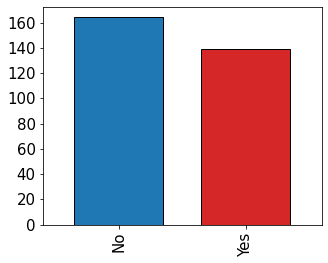

In [3]:
heart['AHD'].value_counts().plot.bar(color=['tab:blue', 'tab:red'], 
                                    fontsize=15, width=0.7, 
                                    figsize=(5, 4), edgecolor='k')
plt.show()

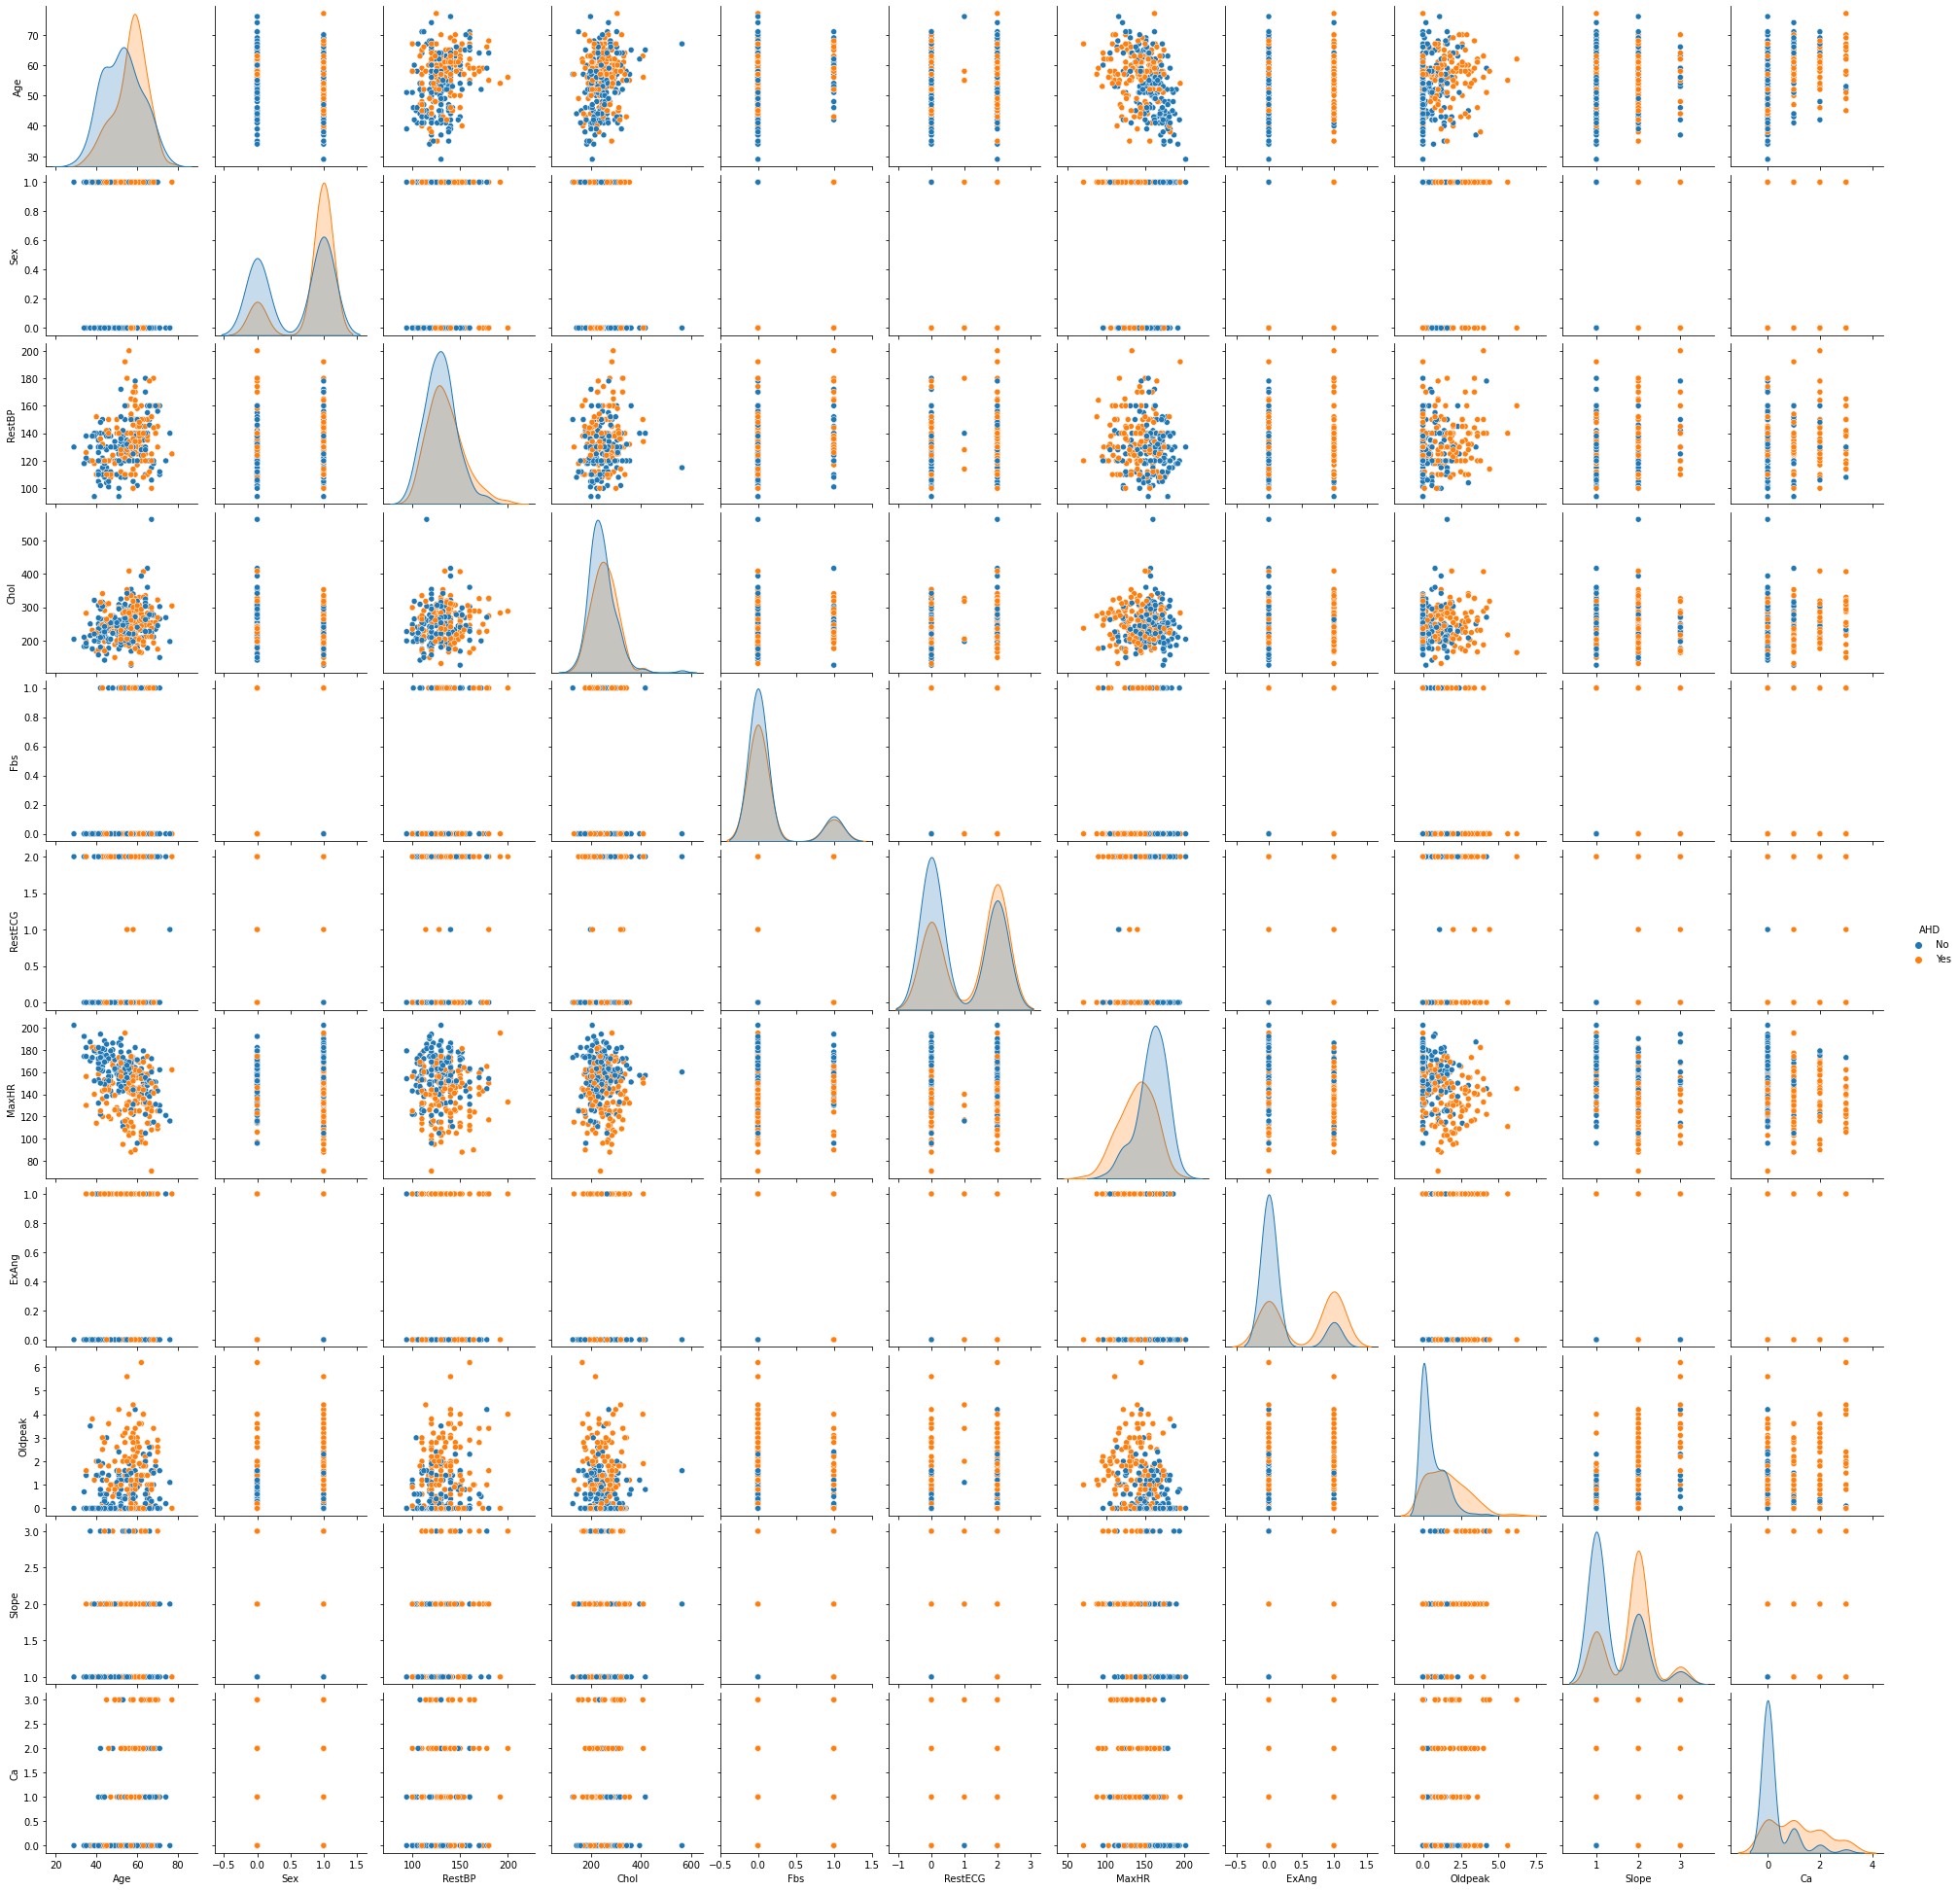

In [4]:
sns.pairplot(heart, hue='AHD')
plt.show()

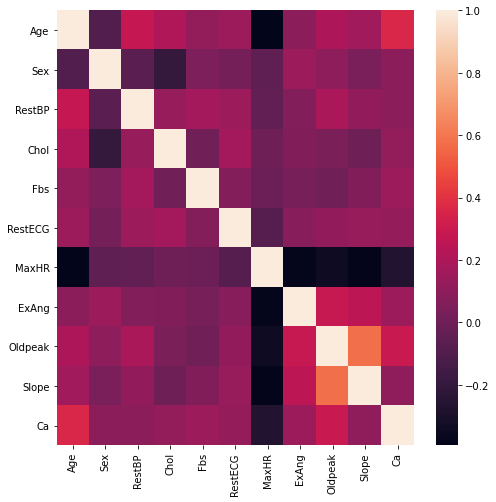

In [5]:
plt.figure(figsize=(8, 8))
sns.heatmap(heart.corr())
plt.show()

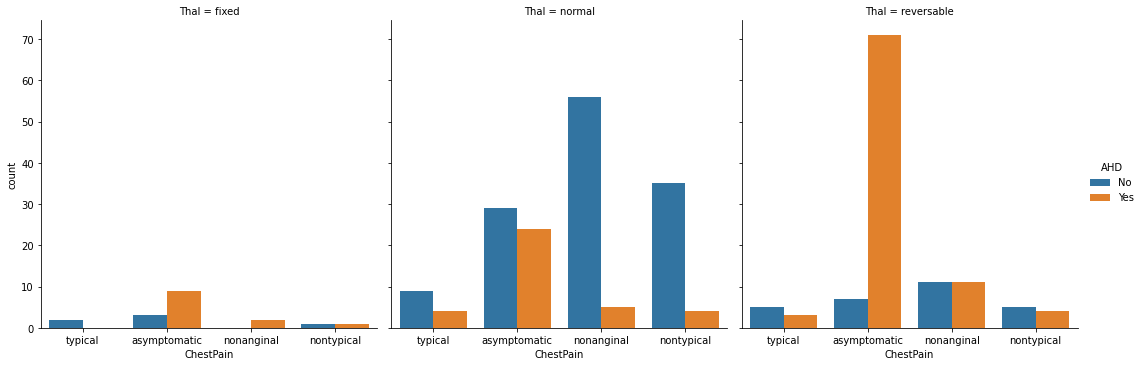

In [13]:
sns.catplot(x='ChestPain', col='Thal', hue='AHD', data=heart, kind='count')
plt.show()

In [6]:
heart.isna().sum()

Age          0
Sex          0
ChestPain    0
RestBP       0
Chol         0
Fbs          0
RestECG      0
MaxHR        0
ExAng        0
Oldpeak      0
Slope        0
Ca           4
Thal         2
AHD          0
dtype: int64

In [7]:
missing_place = heart['Thal'].isna() | heart['Ca'].isna()
heart[missing_place]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
88,53,0,nonanginal,128,216,0,2,115,0,0.0,1,0.0,NaN,No
167,52,1,nonanginal,138,223,0,0,169,0,0.0,1,NaN,normal,No
193,43,1,asymptomatic,132,247,1,2,143,1,0.1,2,NaN,reversable,Yes
267,52,1,asymptomatic,128,204,1,0,156,1,1.0,2,0.0,NaN,Yes
288,58,1,nontypical,125,220,0,0,144,0,0.4,2,NaN,reversable,No
303,38,1,nonanginal,138,175,0,0,173,0,0.0,1,NaN,normal,No


In [8]:
heart['Ca'].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [9]:
heart['Thal'].value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [9]:
# heart = heart.fillna(heart.mode)

In [10]:
heart.isna().any().any()

True

In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, GridSearchCV

In [11]:


# from sklearn.tree import DecisionTreeClassifier
# from sklearn.pipeline import Pipeline

In [11]:
heart.sample()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
189,54,1,nontypical,192,283,0,2,195,0,0.0,1,1.0,reversable,Yes


In [12]:
y = heart['AHD']
X = heart.drop('AHD', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

cat_feat = ['ChestPain', 'Thal']

In [13]:
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [14]:
le = LabelEncoder()
imputer = SimpleImputer(strategy='most_frequent')
oe = OrdinalEncoder()

tree = DecisionTreeClassifier()
# rf = RandomForestClassifier()

pipe = Pipeline([
                 ('impute', imputer), 
                 ('oe', oe), 
                 ('rf', tree)
])

In [15]:
pipe.fit(X_train, y_train)
pipe.score(X_train, y_train)

1.0

In [16]:
pipe.score(X_train, y_train)

1.0

In [17]:
X_test.isna().any()

Age          False
Sex          False
ChestPain    False
RestBP       False
Chol         False
Fbs          False
RestECG      False
MaxHR        False
ExAng        False
Oldpeak      False
Slope        False
Ca            True
Thal         False
dtype: bool

In [20]:
X_test = X_test.fillna(X_test.median())

In [21]:
pipe.predict(X_test)

ValueError: Found unknown categories [29] in column 0 during transform

In [28]:
X_test[X_test['Age'] == 104]

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal


In [29]:
y_test

array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0])

In [30]:
X_test['Age'].dtype

dtype('int64')

In [31]:
pipe.predict(X_test)

ValueError: Found unknown categories [104, 114] in column 3 during transform

In [20]:
pipe.score(X_test, y_test)

ValueError: Found unknown categories [77] in column 0 during transform

In [89]:
# encoder = LabelEncoder()
# encoder.fit_transform(y_train.values)
# list(y_train)

In [97]:
X_train.head()
X_mini = X_train.drop(['ChestPain', 'Thal'], axis=1)
X_mini = X_mini.fillna(method='ffill')

In [99]:
rf = RandomForestClassifier()

rf.fit(X_mini, y_train)
rf.score(X_mini, y_train)

1.0

In [100]:
X_mini_2 = X_test.drop(['ChestPain', 'Thal'], axis=1)
X_mini_2 = X_mini_2.fillna(method='ffill')
rf.score(X_mini_2, y_test)

0.8289473684210527

In [6]:
# Logistic regression form scratch 

In [7]:
# Exploratory Data Analysis 

In [8]:
# Pre-processing 

In [10]:
heart.groupby('Sex').value_count()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_count'